Centre-Back_players.csv



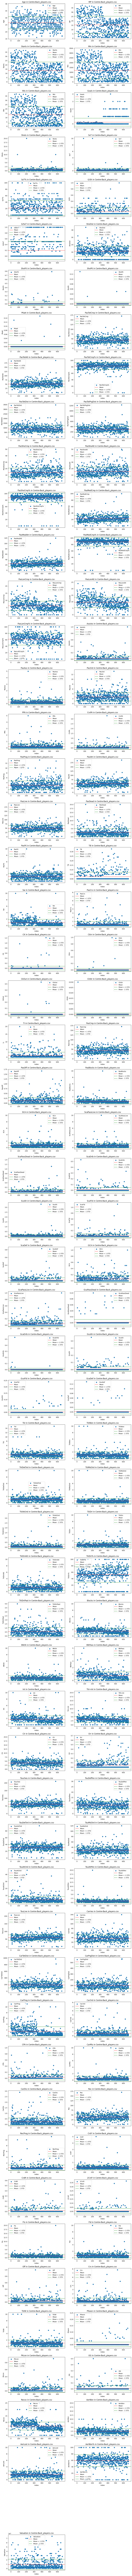

Defensive Midfield_players.csv



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the CSV files
paths = [
    'Centre-Back_players.csv',
    'Defensive Midfield_players.csv',
    'Centre-Forward_players.csv',
    'Attacking Midfield_players.csv',
    'Back_players.csv',
    'Goalkeeper_players.csv',
    'Winger_players.csv',
    'combined.csv'
]

# Function to plot scatter plots for each column to identify missing values or outliers
def plot_scatter_for_columns(file_path):
    print(file_path)
    print()
    df = pd.read_csv(file_path)

    # Set up the plotting area
    num_columns = len(df.columns)
    num_rows = (num_columns + 1) // 2  # Adjust the number of rows
    plt.figure(figsize=(12, num_rows * 4))
    
    for i, column in enumerate(df.columns, 1):
        if pd.api.types.is_numeric_dtype(df[column]):
            plt.subplot(num_rows, 2, i)
            plt.scatter(range(len(df[column])), df[column], label=column)
            plt.title(f'{column} in {file_path}')
            plt.xlabel('Index')
            plt.ylabel(column)
            plt.axhline(df[column].mean(), color='r', linestyle='--', label='Mean')
            plt.axhline(df[column].mean() + df[column].std(), color='g', linestyle='--', label='Mean + 1 STD')
            plt.axhline(df[column].mean() - df[column].std(), color='g', linestyle='--', label='Mean - 1 STD')
            plt.legend()

    plt.tight_layout()
    output_path = os.path.splitext(file_path)[0] + '_scatter_plots.png'
    plt.savefig(output_path)
    plt.show()
    return output_path

# Apply the function to each file
output_paths = [plot_scatter_for_columns(path) for path in paths]
output_paths
